## **Fouille de données (2023-2024)**

### **Travaux pratiques n°2**

---

**Importation des bibliothèques**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

**Assemblage Google Drive dans Colaboratory**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1/**Charger le jeu de données ***titanic.csv*** dans une variable nommée $df\_titanic$. Affiche le nombre total d'observations ainsi que les $5$ premières lignes de $df\_titanic$.

In [ ]:
df=pd.DataFrame([[20,17,74, np.nan], [0.12,1.5,0.01],[],[12], [np.nan, 7, 12]])
df. rename(columns={0: "A1",1: "A2", 2: "A3", 3:"44"}, inplace=True)
df.dropna(thresh=1, inplace=True)
df.dropna (how="all", inplace=True)
df.dropna(axis=1,how="all",inplace=True)
df['A1'].bfill(inplace=True);

print()

In [ ]:
import pandas as pd
from sklearn.preprocessing import *
data=pd.DataFrame([["Fort", "Oui"],["Faible", "Non"],
["Moyen", "Oui"], ["Fort", "Oui"]], columns=["Att1", "Att2"])
enc=OrdinalEncoder(categories=[["Fort","Moyen","Faible"]])

data["Att1"]=enc. fit_transform(data.iloc[:,[0]])
data=data.astype({'Att1':'int32'})
data

,Att1,Att2
0,0,Oui
1,2,Non
2,1,Oui
3,0,Oui


In [ ]:
df_titanic=pd.read_csv('/content/drive/MyDrive/titanic (1).csv', sep=",")
df_titanic.head(5)

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,male,22.0,1,0,A/5 21171,7.250,NaN,S,0
1,female,38.0,1,0,PC 17599,NaN,C85,C,1
2,female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,1
3,female,35.0,1,0,113803,53.100,C123,S,1
4,male,35.0,0,0,373450,NaN,NaN,S,0


**2/** Afficher le type de chaque attribut de $df\_titanic$ en indiquant le nombre d'observations **non-null** pour chaque attribut


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Ticket    891 non-null    object 
 5   Fare      888 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


**3/** Afficher un résumé statistique de toutes les colonnes de $df\_titanic$

In [ ]:
df_titanic.describe(include='all')

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891,714.000000,891.000000,891.000000,891,888.000000,204,889,891.000000
unique,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN
freq,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,NaN,29.699118,0.523008,0.381594,NaN,32.188447,NaN,NaN,0.383838
std,NaN,14.526497,1.102743,0.806057,NaN,49.753475,NaN,NaN,0.486592
min,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,20.125000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


**4/** Déterminer le <u>nombre total de valeurs manquantes</u> (**NaN**) ainsi que <u>celui pour chaque attribut</u>

In [ ]:
df_titanic.isnull().sum()

Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          3
Cabin       687
Embarked      2
Survived      0
dtype: int64

**5/** Créer deux listes, $l\_discret$ et $l\_num$, qui contiennent respectivement les noms des colonnes avec des valeurs catégorielles et numériques dans $df\_titanic$

In [ ]:
#l_num=--------
#l_discret=----------
df_titanic._get_numeric_data().columns
numerique=list(df_titanic._get_numeric_data().columns)
descert=set(df_titanic.columns)-set(numerique)
print(numerique)
print(descert)

['Age', 'SibSp', 'Parch', 'Fare', 'Survived']
{'Embarked', 'Sex', 'Cabin', 'Ticket'}


**6/** Présenter la **<u>matrice de corrélation de Pearson</u>** entre les différents attributs numériques de $df\_titanic$

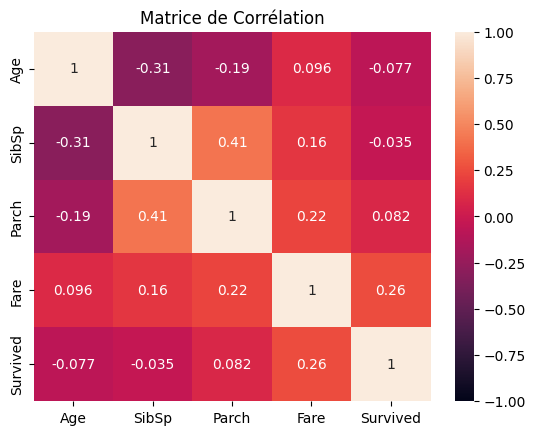

In [ ]:
df_corr=df_titanic.corr(numeric_only= True)
sns.heatmap(df_corr, annot=True,vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

**7/**  Représenter les boxplots de l'attribut **"Fare"** de $df\_titanic$, en en fonction des valeurs de l'attribut numérique qui présente la corrélation la plus élevée. Ensuite,  remplir les valeurs manquantes de l'attribut **"Fare"** avec les valeurs appropriées.

Age         0.095936
SibSp       0.159149
Parch       0.220777
Fare        1.000000
Survived    0.256274
Name: Fare, dtype: float64


Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

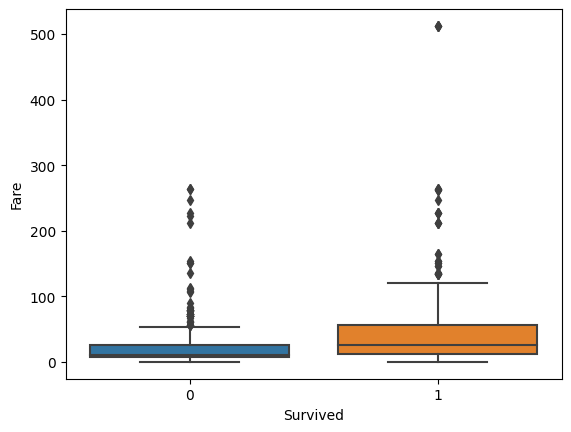

In [ ]:
print(df_corr["Fare"])


sns.boxplot(data=df_titanic,x="Survived",y="Fare")
med1=df_titanic[df_titanic['Survived']==0]['Fare'].median()#choi
med2=df_titanic[df_titanic['Survived']==1]['Fare'].median()#choi
df_titanic['Fare'].fillna(df_titanic['Survived'].apply(lambda x: med1 if x==0 else med2 ), inplace=True)
df_titanic.isnull().sum()


**8/** Trier $df\_titanic$ en ordre décroissant en fonction de l'attribut ayant <u>une forte corrélation</u> avec **"Age"**. Ensuite, remplir les valeurs manquantes de l'attribut **"Age"** de $df\_titanic$ avec les valeurs de la cellule précédente dans la même colonne

In [ ]:
df_titanic.sort_values(by="SibSp", inplace=True, ascending=False, ignore_index=True)
df_titanic['Age'].fillna(method='ffill', inplace=True)
df_titanic


,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,male,NaN,8,2,CA. 2343,69.5500,B96 B98,S,0
1,female,NaN,8,2,CA. 2343,69.5500,B96 B98,S,0
2,male,NaN,8,2,CA. 2343,69.5500,B96 B98,S,0
3,female,NaN,8,2,CA. 2343,69.5500,B96 B98,S,0
4,male,NaN,8,2,CA. 2343,69.5500,B96 B98,S,0
...,...,...,...,...,...,...,...,...,...
886,female,38.0,0,0,330980,7.8792,B96 B98,Q,1
887,female,45.0,0,1,2691,14.4542,B96 B98,C,0
888,male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,B96 B98,S,0
889,male,30.0,0,0,C 7076,7.2500,B96 B98,S,0


**9/** Remplir les valeurs manquantes de l'attribut **"Cabin"** de $df\_titanic$ avec <u>l'élément le plus fréquent</u>

In [ ]:
mf_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
arr=mf_imputer.fit_transform(df_titanic.loc[:,['Cabin']])
pd.DataFrame(arr,columns=['Cabin'])

,Cabin
0,B96 B98
1,B96 B98
2,B96 B98
3,B96 B98
4,B96 B98
...,...
886,B96 B98
887,B96 B98
888,B96 B98
889,B96 B98


**10/** Supprimer les observations ayant des valeurs manquantes dans l'attribut **"Embarked"** de $df\_titanic$

In [ ]:
df_titanic.dropna(subset="Embarked",axis=0, inplace=True)

**11/** Créer une figure avec $4$ axes où <u>chaque ligne comporte $2$ axes</u> : chacun de ces axes affiche ***l'histogramme de la distribution d'un attribut catégoriel*** à partir de $df\_titanic$. Ensuite, supprimer l'attribut ou les attributs discrets <u>que vous jugez inutiles</u> à partir de $df\_titanic$

<Axes: xlabel='Embarked', ylabel='count'>

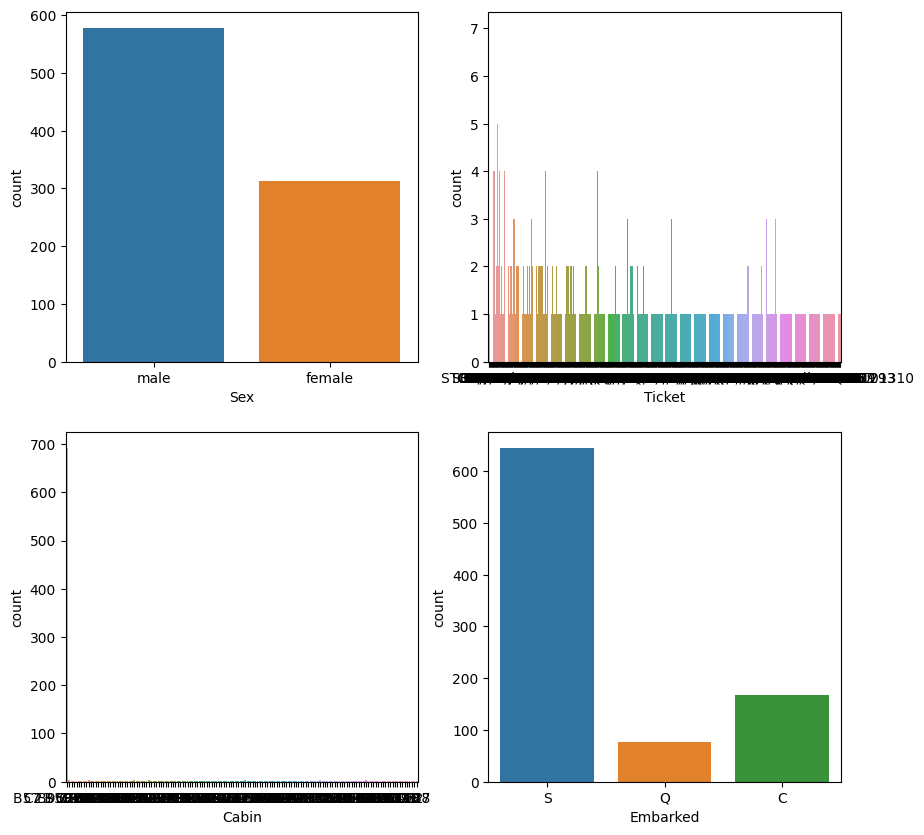

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x="Sex", data=df_titanic)
plt.subplot(2,2,2)
sns.countplot(x="Ticket", data=df_titanic)
plt.subplot(2,2,3)
sns.countplot(x="Cabin", data=df_titanic)
plt.subplot(2,2,4)
sns.countplot(x="Embarked", data=df_titanic)


In [ ]:
#Supprimer l'attribut ou les attributs discrets que vous jugez inutiles à partir de  df_titanic
#------
df_titanic.drop(labels=["Cabin","Ticket"],
axis=1, inplace=True)

**12/** Vérifier que $df\_titanic$ ne comporte aucune valeur manquante et traiter les données aberrantes de tous les attributs numériques de $df\_titanic$

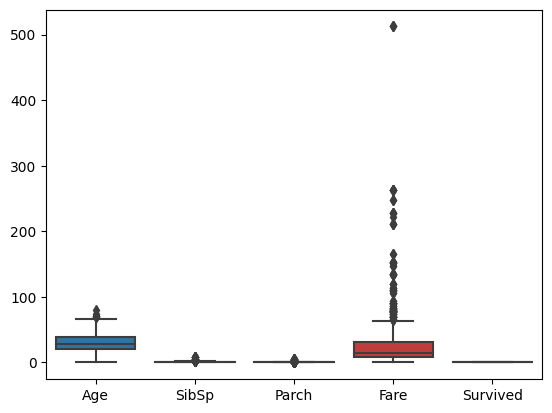

In [ ]:
#Vérifier que  df_titanic  ne comporte aucune valeur manquante
#-----
sns.boxplot(data=df_titanic[numerique])
plt.show()

In [ ]:
#Traiter les données aberrantes de tous les attributs numériques de df_titanic
#-----
X=[77,18,4,22,90,101,32,7,51]
Q1,Q3=np.percentile(X, [25,75])
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
X=np.where(X>upper_limit,
upper_limit, np.where(X<lower_limit,lower_limit,X))
print(IQR)
print(Q1)


59.0
18.0


**13/** Encoder les valeurs des attributs **"Sex"** (**female**, **male**) et **"Embarked"** (**C**, **Q** et **S**) de $df\_titanic$  en <u>valeurs numériques ordinales</u>

In [ ]:
enc = OrdinalEncoder()
df_titanic[['Sex',"Embarked"]]=enc.fit_transform(df_titanic.loc[:,["Sex", "Embarked"]])
df_titanic

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1.0,22.0,1,0,A/5 21171,7.250,NaN,2.0,0
1,0.0,38.0,1,0,PC 17599,NaN,C85,0.0,1
2,0.0,26.0,0,0,STON/O2. 3101282,7.925,NaN,2.0,1
3,0.0,35.0,1,0,113803,53.100,C123,2.0,1
4,1.0,35.0,0,0,373450,NaN,NaN,2.0,0
...,...,...,...,...,...,...,...,...,...
886,1.0,27.0,0,0,211536,13.000,NaN,2.0,0
887,0.0,19.0,0,0,112053,30.000,B42,2.0,1
888,0.0,NaN,1,2,W./C. 6607,23.450,NaN,2.0,0
889,1.0,26.0,0,0,111369,30.000,C148,0.0,1


**14/** Afficher un histogramme illustrant la distribution des âges de $df\_titanic$ selon $4$ intervalles, <u>avec une courbe de densité gaussienne intégrée</u> dans la même figure. Ensuite, discrétiser les valeurs en utilisant un ***encodage ordinal***, <u>en choisissant la technique appropriée</u>

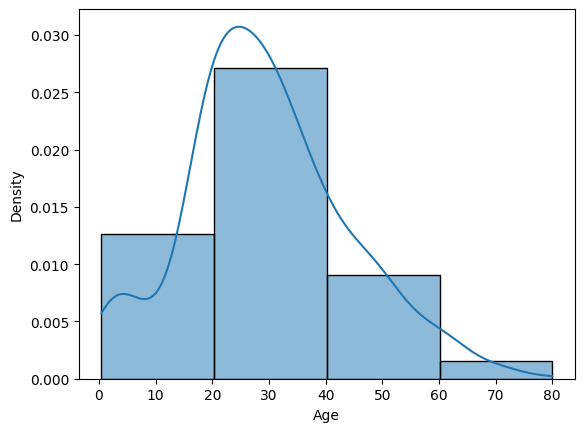

In [ ]:

#Afficher un histogramme illustrant la distribution des âges de  df_titanic  selon  4  intervalles, avec une courbe de densité gaussienne intégrée dans la même figure
#-----
sns.histplot(df_titanic['Age'], kde=True,stat='density', bins=4)
enc=KBinsDiscretizer(n_bins=4,encode='ordinal', strategy='uniform')


In [ ]:
#Discrétiser les valeurs en utilisant un encodage ordinal, en choisissant la technique appropriée
#------
df_titanic['Age']= enc.fit_transform(df_titanic.loc[:,['Age']])

**15/** Sélectionner **<u>les descripteurs les plus importants</u>** à partir de $df\_titanic$ en appliquant la technique de la variance, avec un seuil ne dépassant pas $0.1$.

In [ ]:
s=VarianceThreshold(threshold=0.1)
X_selected= s.fit_transform(df_titanic) #[0 1 2 4 5 6]
# Obtenir les indices des colonnes non-supprimées
ind_col= s.get_support(indices=True)
df_titanic=pd.DataFrame(X_selected,columns=list(df_titanic.iloc[:,ind_col]))

**16/** Exporter en CSV le DataFrame résultat de $df\_titanic$ sous le nom ***titanic_preprocess.csv***

In [ ]:
df_titanic.to_csv("/content/drive/MyDrive/titanic_preprocess.csv", index=False)